In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("/home/ajay/data science/airfoil_self_noise.csv")
df.head()

,Frquency(Hz),Angle_of_Attack,Chord_Length,Free_stream_velocity,Displacement,Sound_pressure_level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Frquency(Hz)          1503 non-null   int64  
 1   Angle_of_Attack       1503 non-null   float64
 2   Chord_Length          1503 non-null   float64
 3   Free_stream_velocity  1503 non-null   float64
 4   Displacement          1503 non-null   float64
 5   Sound_pressure_level  1503 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 70.6 KB


In [4]:
df.isna().count()

Frquency(Hz)            1503
Angle_of_Attack         1503
Chord_Length            1503
Free_stream_velocity    1503
Displacement            1503
Sound_pressure_level    1503
dtype: int64

In [5]:
correlation=df.corr()
correlation

,Frquency(Hz),Angle_of_Attack,Chord_Length,Free_stream_velocity,Displacement,Sound_pressure_level
Frquency(Hz),1.000000,-0.272765,-0.003661,0.133664,-0.230107,-0.390711
Angle_of_Attack,-0.272765,1.000000,-0.504868,0.058760,0.753394,-0.156108
Chord_Length,-0.003661,-0.504868,1.000000,0.003787,-0.220842,-0.236162
Free_stream_velocity,0.133664,0.058760,0.003787,1.000000,-0.003974,0.125103
Displacement,-0.230107,0.753394,-0.220842,-0.003974,1.000000,-0.312670
Sound_pressure_level,-0.390711,-0.156108,-0.236162,0.125103,-0.312670,1.000000


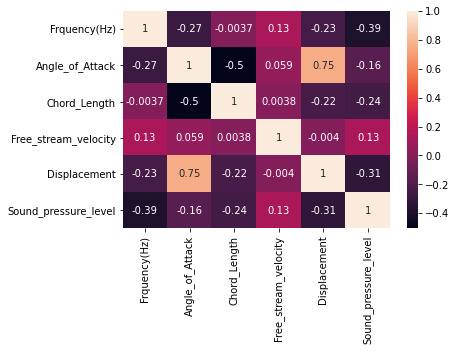

In [6]:
sns.heatmap(correlation,annot=True)
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,r2_score

In [8]:
y=df.Sound_pressure_level
x=df.drop(['Sound_pressure_level'],axis=1)
y

0       126.201
1       125.201
2       125.951
3       127.591
4       127.461
         ...   
1498    110.264
1499    109.254
1500    106.604
1501    106.224
1502    104.204
Name: Sound_pressure_level, Length: 1503, dtype: float64

In [9]:
x.head()

,Frquency(Hz),Angle_of_Attack,Chord_Length,Free_stream_velocity,Displacement
0,800,0.0,0.3048,71.3,0.002663
1,1000,0.0,0.3048,71.3,0.002663
2,1250,0.0,0.3048,71.3,0.002663
3,1600,0.0,0.3048,71.3,0.002663
4,2000,0.0,0.3048,71.3,0.002663


In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1)

In [11]:
model=linear_model.LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [12]:
model_pred=model.predict(x_test)

In [13]:
model_pred

array([129.30948798, 122.51097534, 121.43650598, 124.06384432,
       123.00675267, 128.50801359, 122.06679887, 119.88883684,
       125.90134344, 124.31784392, 127.12270781, 125.81534396,
       118.66225066, 121.39674654, 122.61241096, 131.77674249,
       124.75445969, 117.64565952, 121.21323263, 127.14128854,
       116.8654661 , 128.92704762, 125.89465193, 111.23724271,
       128.2734191 , 123.45574077, 115.84957195, 120.23161649,
       121.84329243, 127.18343514, 120.66167828, 123.14706054,
       117.93752846, 122.14887753, 126.48962761, 126.95567667,
       120.24155479, 132.87114976, 122.87009425, 121.22713506,
       128.00802643, 129.91473593, 125.01875354, 119.05054199,
       107.32317722, 124.99681999, 131.40999462, 119.63556141,
       126.67226989, 126.7473109 , 129.07333919, 120.97164491,
       130.90396625, 124.1558223 , 126.02073642, 130.23612521,
       124.41703333, 129.49571756, 126.36311664, 129.37303092,
       112.56687078, 124.73194983, 117.65478364, 127.14

In [14]:
print("model coefficient:",model.coef_)
print("model intercept:",model.intercept_)

model coefficient: [-1.28841642e-03 -4.16889549e-01 -3.59835769e+01  9.76209757e-02
 -1.54707573e+02]
model intercept: 133.09153820032537


In [15]:
print("mean square value (MSV):%.4f"%mean_squared_error(y_test,model_pred))
print("cofficient of determinaton :%.4f"%r2_score(y_test,model_pred))

mean square value (MSV):24.8381
cofficient of determinaton :0.4618


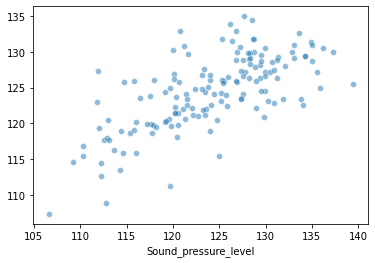

In [16]:
sns.scatterplot(y_test,model_pred,alpha=.5)